# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: IAD25
Członkowie: Maria Zalewska, Karolina Minor, Maciej Zabdyr, Filip Przyczyna

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych

Poniższy kod wczytuje do zmiennej `eruptions_data` dane z przygotowanego wcześniej pliku eruptions_data.pkl.
Wyświetl przygotowaną tablicę.

In [3]:
eruptions_data = pd.read_pickle("eruption_data.pkl")
eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
22486,Cotopaxi,Confirmed,2.0,2022,10.0,21.0,2022.0,12.0,19.0,Observations,Reported
22481,Taal,Confirmed,1.0,2022,10.0,5.0,2022.0,10.0,29.0,Observations,Reported
22458,Turrialba,Confirmed,1.0,2022,7.0,17.0,2022.0,7.0,17.0,Observations,Reported
22453,Ulawun,Confirmed,2.0,2022,6.0,2.0,2022.0,6.0,2.0,Observations,Reported
22454,Raung,Confirmed,2.0,2022,5.0,14.0,2022.0,9.0,27.0,Observations,Satellite (infrared)
...,...,...,...,...,...,...,...,...,...,...,...
14556,Tongariro,Confirmed,5.0,-9650,NaN,NaN,NaN,NaN,NaN,Correlation,Tephrochronology
21101,Craters of the Moon,Confirmed,0.0,-10060,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
22141,Igwisi Hills,Confirmed,1.0,-10450,NaN,NaN,NaN,NaN,NaN,Isotopic,Cosmic Ray Exposure


### Zadanie 4: Konstrukcja szeregów rodzielczych - bardziej skomplikowane tablice [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablicy `vei_data` zawierającej następujące elementy:

> Indeks: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej.

> Kolumny: 2-poziomowe nagłówki, dla każdego z nagłówków 1 poziomu powtarza się cały zestaw nagłówków 2 poziomu

>> Nagłówki 1 poziomu: All, Confirmed Eruption, Uncertain Eruption </br>
>> Całość danych oraz grupy wyznaczone na podstawie kolumny Eruption category</br>

>> Nagłówki 2 poziomu: f, cf, rf, crf </br>
>> Zliczenia poszczególnych kategorii (ang. frequency, absolute frequency), zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),  rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency), crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency)

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [4]:
poziom1 = ['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions']
poziom2 = ['f', 'cf', 'rf', 'crf']

# przygotowanie danych/wklejony kod z poprzedniego zestawu
columns = ['f', 'cf', 'rf', 'crf']
vei_data_1 = pd.DataFrame(columns=columns)
unique_val = eruptions_data["VEI"].drop_duplicates()
vei_data_1['f'] = eruptions_data['VEI'].value_counts()
vei_data_1 = vei_data_1.sort_index()
vei_data_1.index.name = "VEI"
vei_data_1.index = vei_data_1.index.astype(int)
vei_data_1['cf'] = vei_data_1["f"].cumsum()
vei_data_1['rf']=vei_data_1['f']/vei_data_1['cf'].max()
vei_data_1['crf']=vei_data_1['cf']/vei_data_1['cf'].max()

vei_data_2 = pd.DataFrame(columns=columns)
filtered_data = eruptions_data[eruptions_data["Eruption Category"] == "Confirmed"]
unique_val = filtered_data["VEI"].drop_duplicates()
vei_data_2['f'] = filtered_data['VEI'].value_counts()
vei_data_2 = vei_data_2.sort_index()
vei_data_2.index.name = "VEI"
vei_data_2.index = vei_data_2.index.astype(int)
vei_data_2['cf'] = vei_data_2["f"].cumsum()
vei_data_2['rf']=vei_data_2['f']/vei_data_2['cf'].max()
vei_data_2['crf']=vei_data_2['cf']/vei_data_2['cf'].max()

vei_data_3 = pd.DataFrame(columns=columns)
filtered_data = eruptions_data[eruptions_data["Eruption Category"] == "Uncertain"]
unique_val = filtered_data["VEI"].drop_duplicates()
vei_data_3['f'] = filtered_data['VEI'].value_counts()
vei_data_3 = vei_data_3.sort_index()
vei_data_3.index.name = "VEI"
vei_data_3.index = vei_data_3.index.astype(int)
vei_data_3['cf'] = vei_data_3["f"].cumsum()
vei_data_3['rf']=vei_data_3['f']/vei_data_3['cf'].max()
vei_data_3['crf']=vei_data_3['cf']/vei_data_3['cf'].max()

vei_data_all = pd.concat([vei_data_1, vei_data_2, vei_data_3], keys=['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'], axis=1)

vei_data = pd.DataFrame(vei_data_all, columns=pd.MultiIndex.from_product([poziom1, poziom2]))
vei_data = vei_data.style.format({
    ('All eruptions', 'f'): '{:.0f}',
    ('All eruptions', 'cf'): '{:.0f}',
    ('All eruptions', 'rf'): '{:.4f}',
    ('All eruptions', 'crf'): '{:.4f}',
    ('Confirmed Eruptions', 'f'): '{:.0f}',
    ('Confirmed Eruptions', 'cf'): '{:.0f}',
    ('Confirmed Eruptions', 'rf'): '{:.4f}',
    ('Confirmed Eruptions', 'crf'): '{:.4f}',
    ('Uncertain Eruptions', 'f'): '{:.0f}',
    ('Uncertain Eruptions', 'cf'): '{:.0f}',
    ('Uncertain Eruptions', 'rf'): '{:.4f}',
    ('Uncertain Eruptions', 'crf'): '{:.4f}'
})

display(vei_data)
vei_data = vei_data.data

In [5]:
## Komórka testowa
# Test 1: Indeks
assert (vei_data.index.name == 'VEI') == True
assert list(vei_data.index) == [0, 1, 2, 3, 4, 5, 6, 7]
# Test 2: Kolumny
assert len(set(list(vei_data.columns.levels[0])) & set(['All eruptions', 'Confirmed Eruptions', 'Uncertain Eruptions'])) == 3
assert set(list(vei_data.columns.levels[1])) == set(['f', 'cf', 'rf', 'crf'])
# Test 3: Wartości w kolumnach f
assert list(vei_data['All eruptions']['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
assert list(vei_data['Confirmed Eruptions']['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
assert list(vei_data['Uncertain Eruptions']['f'].values[:5]) == [204, 157, 264, 19, 1] 
assert np.all(np.isnan(vei_data['Uncertain Eruptions']['f'].values[5:]))

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

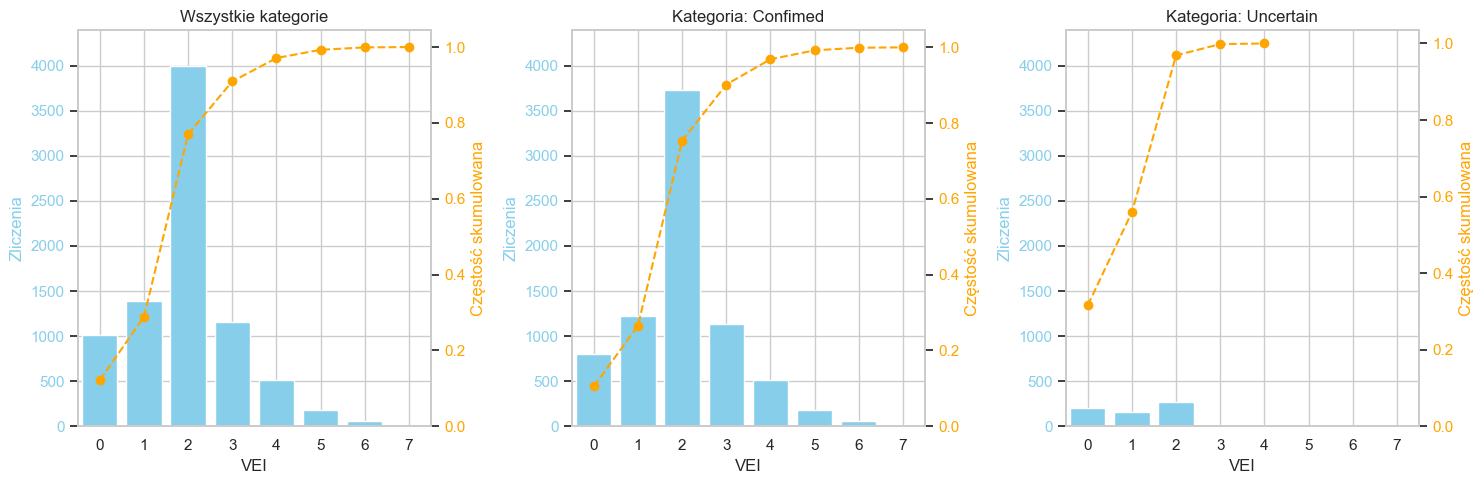

In [6]:
sns.set() 
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for ax in axes:
    ax.set_xlim(-0.5, 7.5)
    ax.set_xticks(np.arange(8))
    ax.set_ylim(0, max(max(vei_data_1['f']), max(vei_data_2['f']), max(vei_data_3['f'])) * 1.1)
    
ax = axes[0]
ax.bar(vei_data_1.index, vei_data[('All eruptions', 'f')], color='skyblue', label='Zliczenia')
ax2 = ax.twinx()
ax2.plot(vei_data_1.index, vei_data[('All eruptions', 'crf')], color='orange', linestyle='--', marker='o', label='Częstość skumulowana')
ax.set_title('Wszystkie kategorie')
ax.set_xlabel('VEI')
ax.set_ylabel('Zliczenia', color='skyblue')
ax2.set_ylabel('Częstość skumulowana', color='orange')
ax.tick_params(axis='y', labelcolor='skyblue')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.grid(False)

ax = axes[1]
ax.bar(vei_data_1.index, vei_data[('Confirmed Eruptions', 'f')], color='skyblue', label='Zliczenia')
ax2 = ax.twinx()
ax2.plot(vei_data_1.index, vei_data[('Confirmed Eruptions', 'crf')], color='orange', linestyle='--', marker='o', label='Częstość skumulowana')
ax.set_title('Kategoria: Confimed')
ax.set_xlabel('VEI')
ax.set_ylabel('Zliczenia', color='skyblue')
ax2.set_ylabel('Częstość skumulowana', color='orange')
ax.tick_params(axis='y', labelcolor='skyblue')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.grid(False)

ax = axes[2]
ax.bar(vei_data_1.index, vei_data[('Uncertain Eruptions', 'f')], color='skyblue', label='Zliczenia')
ax2 = ax.twinx()
ax2.plot(vei_data_1.index, vei_data[('Uncertain Eruptions', 'crf')], color='orange', linestyle='--', marker='o', label='Częstość skumulowana')
ax.set_title('Kategoria: Uncertain')
ax.set_xlabel('VEI')
ax.set_ylabel('Zliczenia', color='skyblue')
ax2.set_ylabel('Częstość skumulowana', color='orange')
ax.tick_params(axis='y', labelcolor='skyblue')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.grid(False)

plt.tight_layout()
plt.show()


### Zadanie 5: Rodzaje metod wykrywania erupcji [10 pkt]

Przygotuj tablice `evidence_data` zawiarającą informacje o tym ile erupcji o poszczególnych wartościach VEI zostało potwierdzonych przy użyciu poszczególnych metod weryfikacji.
Tablica powinna zawierać następujące elementy:

> Indeks: 2-poziomowe nagłówki </br>

>> Nagłówki 1 poziomu: Kategorie dowodów </br>

>> Nagłówki 2 poziomu: Metody, które dostarczyły dowodów </br>

> Kolumny: VEI </br>
> Wartości VEI posortowane od najmniejszej do największej oraz kolumna "All", w której znajdują się dane dotyczące wszystkich erupcji, bez podziału na VEI.

Wyświetl przygotowane tablicę w taki sposób, aby zawarte w tablicy liczby (w tym wartości VEI w nagłówkach kolumn) wyświetlały się bez miejsc po przecinku.

In [7]:
evidence_data = eruptions_data.groupby( [ 'Evidence Type', 'Evidence Method' ] )[ 'VEI' ].value_counts().unstack( fill_value = 0 )
evidence_data[ 'All' ] = evidence_data.sum( axis = 1 )
evidence_data = evidence_data.reindex( columns = [ 'All' ] + sorted( evidence_data.columns[ :-1 ] ) )
display( evidence_data )

VEI                                  All  0.0   1.0   2.0  3.0  4.0  5.0  6.0  \
Evidence Type Evidence Method                                                   
Correlation   Anthropology            19    4     1     5    2    6    1    0   
              Magnetism               41   34     0     5    0    2    0    0   
              Tephrochronology       463   71    16   122  124  103   22    5   
Isotopic      14C (calibrated)       401   41    12    49  100  105   70   21   
              14C (uncalibrated)     372  125     7    34   54   91   41   19   
              Ar/Ar                   15   12     1     0    0    1    1    0   
              Cosmic Ray Exposure     22   20     1     0    0    1    0    0   
              K/Ar                    11   10     0     0    1    0    0    0   
              Uranium-series          24   24     0     0    0    0    0    0   
Observations  Aviation                 1    0     1     0    0    0    0    0   
              Hydrophonic             71   68     3     0    0    0    0    0   
              Photo / Video            3    1     1     1    0    0    0    0   
              Reported              6087  376  1200  3430  837  194   42    7   
              Satellite (infrared)     3    1     0     1    1    0    0    0   
              Satellite (visual)       6    0     2     3    1    0    0    0   
              Seismicity              16   15     0     1    0    0    0    0   
Radiogenic    Fission track            1    0     0     0    1    0    0    0   
              Thermoluminescence       2    1     0     0    0    1    0    0   
Sidereal      Dendrochronology         6    0     0     0    1    2    3    0   
              Ice Core                 9    0     0     3    0    3    0    1   
              Varve Count             76    0     1    66    8    1    0    0   
Uncertain     Unspecified            636  204   138   271   22    1    0    0   

VEI                                 7.0  
Evidence Type Evidence Method            
Correlation   Anthropology            0  
              Magnetism               0  
              Tephrochronology        0  
Isotopic      14C (calibrated)        3  
              14C (uncalibrated)      1  
              Ar/Ar                   0  
              Cosmic Ray Exposure     0  
              K/Ar                    0  
              Uranium-series          0  
Observations  Aviation                0  
              Hydrophonic             0  
              Photo / Video           0  
              Reported                1  
              Satellite (infrared)    0  
              Satellite (visual)      0  
              Seismicity              0  
Radiogenic    Fission track           0  
              Thermoluminescence      0  
Sidereal      Dendrochronology        0  
              Ice Core                2  
              Varve Count             0  
Uncertain     Unspecified             0

In [8]:
# Test 1 Kształt tablicy
assert evidence_data.shape == (22, 9)
# # Test 2 Kolumny
assert len(set(list(evidence_data.columns)) & set([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 'All'])) == 9
# Test 3 Indeks
assert (eruptions_data.index.name == 'Eruption Number') == True
assert len(set(list(evidence_data.index)) & set([('Observations', 'Reported'), ('Observations', 'Satellite (infrared)'), ('Observations', 'Satellite (visual)'),
                                ('Observations', 'Seismicity'), ('Observations', 'Hydrophonic'), ('Observations', 'Photo / Video'), ('Observations', 'Aviation'),
                                ('Uncertain', 'Unspecified'), ('Isotopic', 'Uranium-series'), ('Isotopic', '14C (calibrated)'), ('Isotopic', '14C (uncalibrated)'),
                                ('Isotopic', 'Cosmic Ray Exposure'), ('Isotopic', 'Ar/Ar'), ('Isotopic', 'K/Ar'), ('Correlation', 'Magnetism'), ('Correlation', 'Tephrochronology'),
                                ('Correlation', 'Anthropology'), ('Sidereal', 'Varve Count'), ('Sidereal', 'Dendrochronology'), ('Sidereal', 'Ice Core'), ('Radiogenic', 'Fission track'),
                                ('Radiogenic', 'Thermoluminescence')])) == 22
# Test 4 Kilka losowo wybranych wartości w tablicy
assert evidence_data.loc[('Observations', 'Reported'), 0] == 376
assert evidence_data.loc[('Uncertain', 'Unspecified'), 3] == 22
assert evidence_data.loc[('Sidereal', 'Ice Core'), 7] == 2
assert evidence_data.loc[('Isotopic', '14C (uncalibrated)'), 5] == 41
assert evidence_data.loc[('Correlation', 'Anthropology'), 6] == 0

### Zadanie 6: Wizualizacja rozkładu zarejestrowanych erupcji w czasie [2 pkt]

Korzystając z funkcji `seaborn.stripplot()` zwizualizuj jak rozkładały się w czasie wystąpienia zarejestrowanych erupcji. Do rozróżnienia erupcji w czasie wykorzystaj rok, w którym nastąpił ich początek.

Wyniki zestaw na pojedynczej figurze (siatka wykresów 2x1). Na górnym wykresie przedstaw dane rozróżnione tylko po kątem VEI, a na dolnym wykresie przedstaw dane rozróżnione zarówno po VEI jak i rodzaju dowodu ich wystąpienia (Evidence Type). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- dodaj legendę do dolnego wykresu w taki sposób, aby nie zasłaniała znajdujących nię na nim danych,
- ustaw format wyświetlania wartości VEI bez miejsc po przecinku.

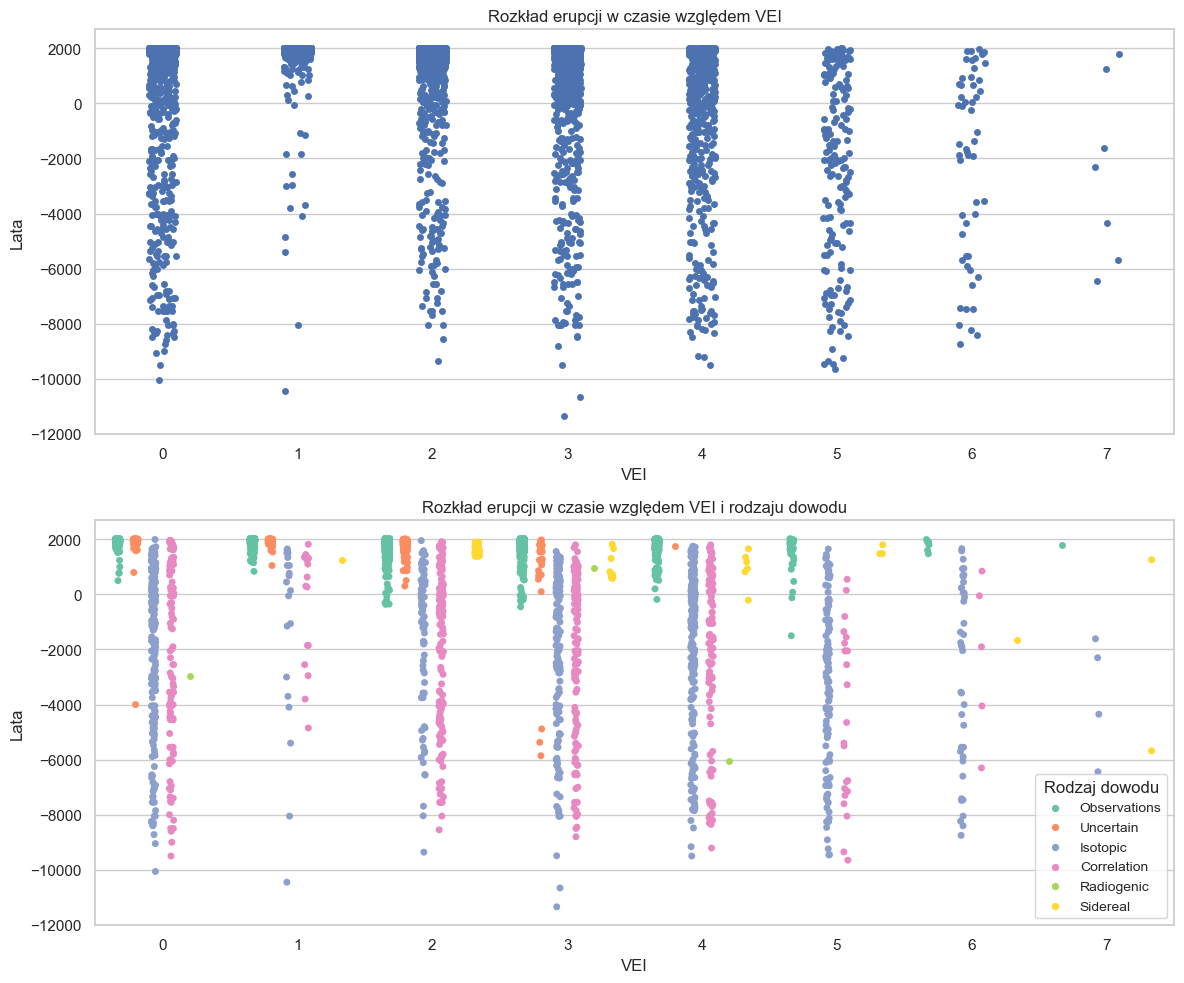

In [9]:
sns.set() 
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots( nrows = 2, ncols = 1, figsize = ( 12, 10 ) )

sns.stripplot( x = "VEI", y = "Start Year", data = eruptions_data, ax = axes[0] )
axes[0].set_title( 'Rozkład erupcji w czasie względem VEI' )
axes[0].set_ylabel( 'Lata' )

sns.stripplot( x = "VEI", y ="Start Year" , hue = "Evidence Type", data = eruptions_data, ax = axes[1], palette = "Set2", dodge = True )
axes[1].set_title( 'Rozkład erupcji w czasie względem VEI i rodzaju dowodu' )
axes[1].set_ylabel( 'Lata' )
axes[1].legend( title = 'Rodzaj dowodu', loc = 'lower right', fontsize='small', markerscale=0.7)

for ax in axes:
    ax.xaxis.set_major_formatter( plt.FuncFormatter( lambda x, _: '{:.0f}'.format( x ) ) )

plt.tight_layout()
plt.show()